<a href="https://colab.research.google.com/github/shauryat1298/HPE_Hackathon/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('2_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df["# Collateral View"].unique()

array([ 0,  2,  1,  4,  3,  5,  9, 13, 27, 41, 15,  6, 17, 19, 44,  8, 14,
        7, 18, 26, 23, 31, 10, 16, 62, 25, 24, 21, 29, 77, 11, 28, 20, 33,
       12, 49, 37, 38, 22, 50, 42, 45, 43, 36, 46, 67, 40, 35, 34])

In [ ]:
df.isnull().sum()*100/len(df)

Date                   0.000000
Campaign ID            0.000000
Campaign Goal Code     0.000000
Campaign Ad ID         0.000000
Ad Digital Channel     0.000000
Ad channel partner     0.000000
Ad Device             68.027293
Ad Group              68.027293
Ad Content ID         37.977892
Ad Content Type        0.025584
Audience Type          0.000000
$ Spend                0.000000
# Impressions          0.000000
# Clicks               0.000000
# Video Completes      0.000000
# Social Likes         0.000000
# Social Shares        0.000000
# Web Visit            0.000000
# Collateral View      0.000000
# Product View         0.000000
# Form Complete        0.000000
dtype: float64

In [ ]:
df.drop(columns=['Ad Device','Ad Group', 'Ad Content ID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Date                379139 non-null  object
 1   Campaign ID         379139 non-null  int64 
 2   Campaign Goal Code  379139 non-null  object
 3   Campaign Ad ID      379139 non-null  int64 
 4   Ad Digital Channel  379139 non-null  object
 5   Ad channel partner  379139 non-null  object
 6   Ad Content Type     379042 non-null  object
 7   Audience Type       379139 non-null  object
 8   $ Spend             379139 non-null  int64 
 9   # Impressions       379139 non-null  int64 
 10  # Clicks            379139 non-null  int64 
 11  # Video Completes   379139 non-null  int64 
 12  # Social Likes      379139 non-null  int64 
 13  # Social Shares     379139 non-null  int64 
 14  # Web Visit         379139 non-null  int64 
 15  # Collateral View   379139 non-null  int64 
 16  # 

<AxesSubplot:>

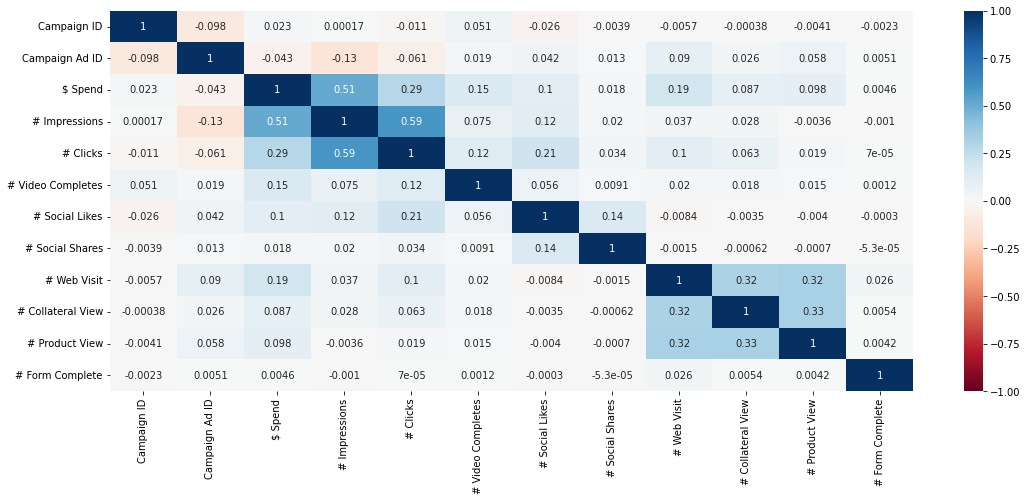

In [ ]:
plt.figure(figsize=(18, 7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')

In [ ]:
df['Ad Content Type'].value_counts()

Video    238652
Text     121662
Image     18728
Name: Ad Content Type, dtype: int64

In [ ]:
df[df['Ad Content Type'].isnull()]['Ad channel partner'].value_counts()

Channel Partner 6    97
Name: Ad channel partner, dtype: int64

In [ ]:
df[df['Ad channel partner']=='Channel Partner 6']['Ad Content Type'].value_counts()

Video    1254
Image     400
Name: Ad Content Type, dtype: int64

In [ ]:
df.drop(columns=['Date', 'Ad Content Type', 'Ad channel partner', 'Campaign ID', 'Campaign Ad ID'], inplace=True)

In [ ]:
df.isnull().sum()

Campaign Goal Code    0
Ad Digital Channel    0
Audience Type         0
$ Spend               0
# Impressions         0
# Clicks              0
# Video Completes     0
# Social Likes        0
# Social Shares       0
# Web Visit           0
# Collateral View     0
# Product View        0
# Form Complete       0
dtype: int64

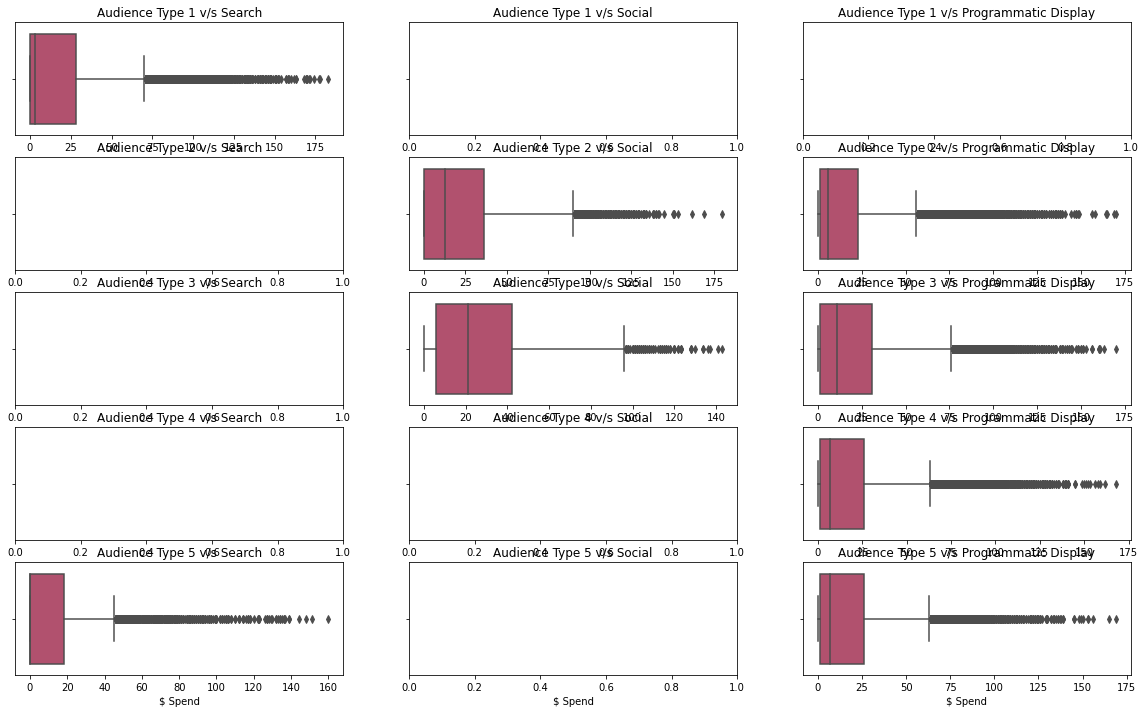

In [ ]:
a = list(df['Audience Type'].unique())
b = list(df['Ad Digital Channel'].unique())

fig, axes = plt.subplots(len(a), len(b), figsize=(20,12), sharey=True)
for i in range(0, len(a)):
    for j in range(0, len(b)):
        dm = df[(df['Ad Digital Channel']==b[j]) & (df['Audience Type']==a[i])]
        ax = sns.boxplot(data=dm, x="$ Spend", palette='flare', ax=axes[i,j])
        axes[i,j].set_title(a[i]+" v/s "+b[j])

In [ ]:
a = ['Audience Type 1', 'Audience Type 2', 'Audience Type 3',
 'Audience Type 4',
 'Audience Type 5']
b = list(df['Ad Digital Channel'].unique())
a
df[(df['Ad Digital Channel']==b[0]) & (df['Audience Type']==a[0])].head()

,Campaign Goal Code,Ad Digital Channel,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,Intent to Buy,Search,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,Intent to Buy,Search,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,Intent to Buy,Search,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,Intent to Buy,Search,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,Intent to Buy,Search,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df[(df['$ Spend']==0) & (df['# Impressions']==0) & (df['# Clicks']==0)].describe().T

,count,mean,std,min,25%,50%,75%,max
$ Spend,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Impressions,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Clicks,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Video Completes,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Social Likes,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Social Shares,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Web Visit,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Collateral View,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Product View,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
# Form Complete,96705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
empty_ind = df[(df['$ Spend']==0) & (df['# Impressions']==0) & (df['# Clicks']==0)].index
empty_ind

Int64Index([     0,      2,      3,      6,      9,     31,     32,     36,
                37,     39,
            ...
            379123, 379124, 379125, 379129, 379130, 379131, 379132, 379133,
            379134, 379135],
           dtype='int64', length=96705)

In [ ]:
df.drop(index=empty_ind, inplace=True)

In [ ]:
df.head()

,Campaign Goal Code,Ad Digital Channel,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
1,Intent to Buy,Search,Audience Type 1,25,72,50,0,0,0,0,0,0,0
4,Intent to Buy,Search,Audience Type 1,10,6,5,0,0,0,1,0,0,0
5,Intent to Buy,Search,Audience Type 1,9,537,0,0,0,0,0,0,0,0
7,Engagement,Search,Audience Type 1,6,65,0,0,0,0,0,0,0,0
8,Engagement,Search,Audience Type 1,3,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Campaign Goal Code', 'Ad Digital Channel', 'Audience Type'], drop_first=True)

In [ ]:
df.head()

,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete,Campaign Goal Code_Consideration,Campaign Goal Code_Engagement,Campaign Goal Code_Intent to Buy,Campaign Goal Code_Purchase,Ad Digital Channel_Search,Ad Digital Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,25,72,50,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,10,6,5,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
5,9,537,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7,6,65,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
lr1_data = df.drop(columns = ['# Video Completes', '# Social Likes', '# Social Shares', '# Web Visit', '# Collateral View', '# Product View', '# Form Complete'])

In [ ]:
lr1_data.head()

,$ Spend,# Impressions,# Clicks,Campaign Goal Code_Consideration,Campaign Goal Code_Engagement,Campaign Goal Code_Intent to Buy,Campaign Goal Code_Purchase,Ad Digital Channel_Search,Ad Digital Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,25,72,50,0,0,1,0,1,0,0,0,0,0
4,10,6,5,0,0,1,0,1,0,0,0,0,0
5,9,537,0,0,0,1,0,1,0,0,0,0,0
7,6,65,0,0,1,0,0,1,0,0,0,0,0
8,3,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
lr1_data["CTR"] = 0
lr1_data['CTR'] = lr1_data.apply(lambda x: x['# Clicks']/x['# Impressions'] if x['# Impressions']!=0 else 0, axis=1)

In [ ]:
for ind, row in lr1_data.iterrows():
  if row['# Impressions']!=0:
    row['CTR'] = row['# Clicks']/row['# Impressions']


# lr1_data = lr1_data.assign(CTR = lambda x: x['# Clicks']/x['# Impressions'] if x['# Impressions']!=0 else 0)

In [ ]:
lr1_data.drop(columns=['# Impressions', '# Clicks'], inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(lr1_data.drop(columns=['CTR']), lr1_data['CTR'])

LinearRegression()

In [ ]:
print(lr.intercept_, lr.coef_, lr.score(lr1_data.drop(columns=['CTR']), lr1_data['CTR']))

0.1441262282055435 [ 0.00348475  0.03564431 -0.04339169 -0.00251822  0.03614323  0.20586497
  0.21760664 -0.12065185 -0.01031644 -0.08297414 -0.12791122] 0.27231267813385585


In [ ]:
l

NameError: ignored